In [67]:
import numpy as np
import sympy as sp

import sympy.physics.units as u

from pprint import pp
from IPython.display import display

In [68]:
class si :
    """
    This is a simple class that provides an easy way to access the engineering prefixes for the metric system.
    Example:
        25*si.k results in 25_000
    """
    Y = 10**24  # Yotta
    Z = 10**21  # Zetta
    E = 10**18  # Exa
    P = 10**15  # Peta
    T = 10**12  # Tera
    G = 10**9   # Giga
    M = 10**6   # Mega
    k = 10**3   # kilo

    m = 10**-3  # milli
    µ = 10**-6  # micro
    u = 10**-6  # micro ## so that we can type u instead of µ
    n = 10**-9  # nano
    p = 10**-12 # pico
    f = 10**-15 # femto
    a = 10**-18 # atto
    z = 10**-21 # zepto
    y = 10**-24 # yocto

## Cramer's Rule

Cramer's Rule is a method of solving a system of equations using the determinants of matrices.  In can be most simply described with the formula
$$
x_i = \frac{\det(A_i)}{\det(A)}
$$

The matrix $A_i$ is the matrix resulting from replacing the column *i* with the column-matrix $b$

Notably, because the formula divides by $\det(A)$, when $\det(A) = 0$, the system can be assumed to have no solutions.




This applies to systems of equations written in standard matrix form.  For example:

$$
Ax = b
$$

Where:  
  -  A is a square matrix  
  -  x is a column matrix  
  -  b is a column matrix  

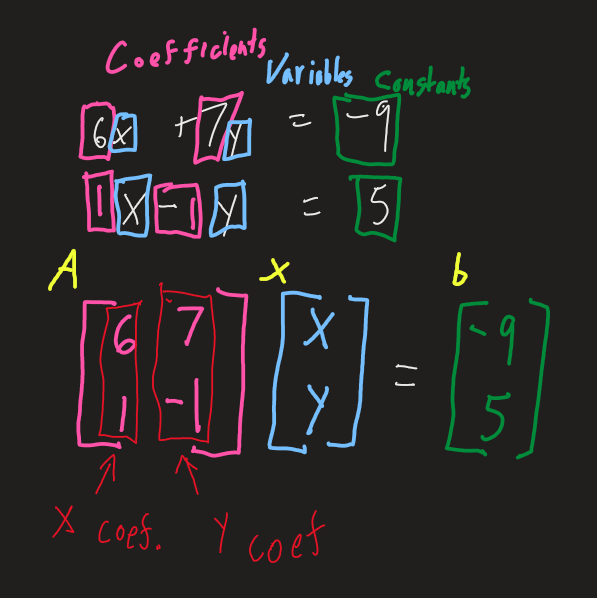

In this notebook we will be using libraries to calculate the determinant for us, but it can also be calculated by hand.

The determinant of a square matrix is the difference of sum of the product of major diagonals (traveling down and right) and the product of the minor diagonals (traveling up and right).

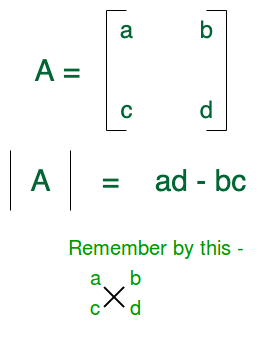

### Using Sympy

Let's examine the system of equations
$$
\begin{align}
4x+2y &= 6 \\
5x+3y &= 7
\end{align}
$$

In [69]:
# First we will define our matrices.

# A square matrix
A = sp.Matrix([
    [4,2],
    [5,3]
])

# Technically we are defining this as a row matrix instead of a column matrix, but it plays nicely with our code.
b = sp.Matrix(
    [6,7]
)


A

Matrix([
[4, 2],
[5, 3]])

In [70]:
b

Matrix([
[6],
[7]])

In [71]:
# We can  use sympy to find the determinant quite easily
A.det()

2

In [72]:
# We can also easily replace a column 
A_x = A.copy()
A_x[:,0] = b
A_x

Matrix([
[6, 2],
[7, 3]])

In [73]:
# And just as easily find the determinant of the new matrix
A_x.det()

4

In [74]:
# Using Cramer's rule we can determine the value of x
A_x.det()/A.det()

2

In [75]:
# Repeat the process for Y
A_y = A.copy()
A_y[:,1] = b

A_y.det()/A.det()

-1

In [76]:
#let's verify that it worked by substituting the values into the original equations.
print(4*2+2*-1)
print(5*2+3*-1)

6
7


$$
\begin{align}
4(2) + 2(-1) &= 6 \\
5(2) + 3(-1) &= 7
\end{align}
$$

## Homework stuff Implementing in a flexible function.

In [77]:
import sympy as sp
from IPython.display import display
from matplotlib.ticker import EngFormatter

In [78]:
engf = EngFormatter()

In [79]:
def cramers_rule(A,b):
    display(A)
    det_A = A.det()
    print(f"detA= {engf(det_A)}\n")

    if det_A == 0:
        raise ValueError("The $\det(A)$ is zero; the system has no unique solution.")
    
    solutions = []

    for i in range(A.cols):
        print(f'I={i}')
        
        A_i = A.copy()
        A_i[:, i] = b
        display(A_i)
        
        det_Ai = A_i.det()
        print(f"det{i}= {engf(det_Ai)}")
        
        sol = det_Ai/det_A
        solutions.append(sol.evalf())
        print(f"sol{i}= {engf(sol)}\n")

    return solutions



In [80]:
A= sp.Matrix([
    [-16.9,4.7,2.2],
    [4.7,-22.9,10],
    [2.2,10,-16.1],
])

b = sp.Matrix(
    [-8,0,0]
)

sol = cramers_rule(A,b)
sol

Matrix([
[-16.9,   4.7,   2.2],
[  4.7, -22.9,    10],
[  2.2,    10, -16.1]])

detA= −3.86757600000000 k

I=0


Matrix([
[-8,   4.7,   2.2],
[ 0, -22.9,    10],
[ 0,    10, -16.1]])

det0= −2.14952000000000 k
sol0= 555.779640787925 m

I=1


Matrix([
[-16.9, -8,   2.2],
[  4.7,  0,    10],
[  2.2,  0, -16.1]])

det1= −781.360000000000
sol1= 202.028350574106 m

I=2


Matrix([
[-16.9,   4.7, -8],
[  4.7, -22.9,  0],
[  2.2,    10,  0]])

det2= −779.040000000000
sol2= 201.428491644379 m



[0.555779640787925, 0.202028350574106, 0.201428491644379]

## Scratch Area

In [81]:
i1, i2, i3, i4 = sp.symbols('I_1, I_2, I_3, I_4')

In [82]:
expr1 = -10*i1 + 6 - 2*(i1-i2)
expr1

-12*I_1 + 2*I_2 + 6

In [83]:
expr2 = -4*i2 - 2*(i2-i1) - 1*(i2-i3) - 8
expr2

2*I_1 - 7*I_2 + I_3 - 8

In [84]:
expr3 = 8 - 1*(i3-i2) - 6 - 5*i3
expr3

I_2 - 6*I_3 + 2

In [85]:
exprs = [expr1, expr2, expr3]
vars = [i1, i2, i3]
A= sp.Matrix([
    [expr.coeff(var) for var in vars] for expr in exprs

])
A

Matrix([
[-12,  2,  0],
[  2, -7,  1],
[  0,  1, -6]])

In [86]:
substitutions = dict(zip(vars, [0 for var in vars]))
b = sp.Matrix(
    [-expr.subs(substitutions) for expr in exprs]
)
b

Matrix([
[-6],
[ 8],
[-2]])

In [87]:
sol = cramers_rule(A,b)
sol

Matrix([
[-12,  2,  0],
[  2, -7,  1],
[  0,  1, -6]])

detA= −468.000000000000

I=0


Matrix([
[-6,  2,  0],
[ 8, -7,  1],
[-2,  1, -6]])

det0= −154.000000000000
sol0= 329.059829059829 m

I=1


Matrix([
[-12, -6,  0],
[  2,  8,  1],
[  0, -2, -6]])

det1= 480.000000000000
sol1= −1.02564102564103

I=2


Matrix([
[-12,  2, -6],
[  2, -7,  8],
[  0,  1, -2]])

det2= −76.0000000000000
sol2= 162.393162393162 m



[0.329059829059829, -1.02564102564103, 0.162393162393162]